In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))
sys.path.append(str(Path(__session__).parent.parent.parent / 'superglue'))

In [17]:
import torch

from models.matching import Matching
from models.utils import (AverageTimer, VideoStreamer,
                          make_matching_plot_fast, frame2tensor)

from utils import *
from detect import *

torch.set_grad_enabled(False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
config = {
    'superpoint': {
        'nms_radius': 4,
        'keypoint_threshold': 0.005,
        'max_keypoints': -1
    },
    'superglue': {
        'weights': 'indoor',
        'sinkhorn_iterations': 20,
        'match_threshold': 0.2
    }
}

In [4]:
matching = Matching(config).eval().to(device)

Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


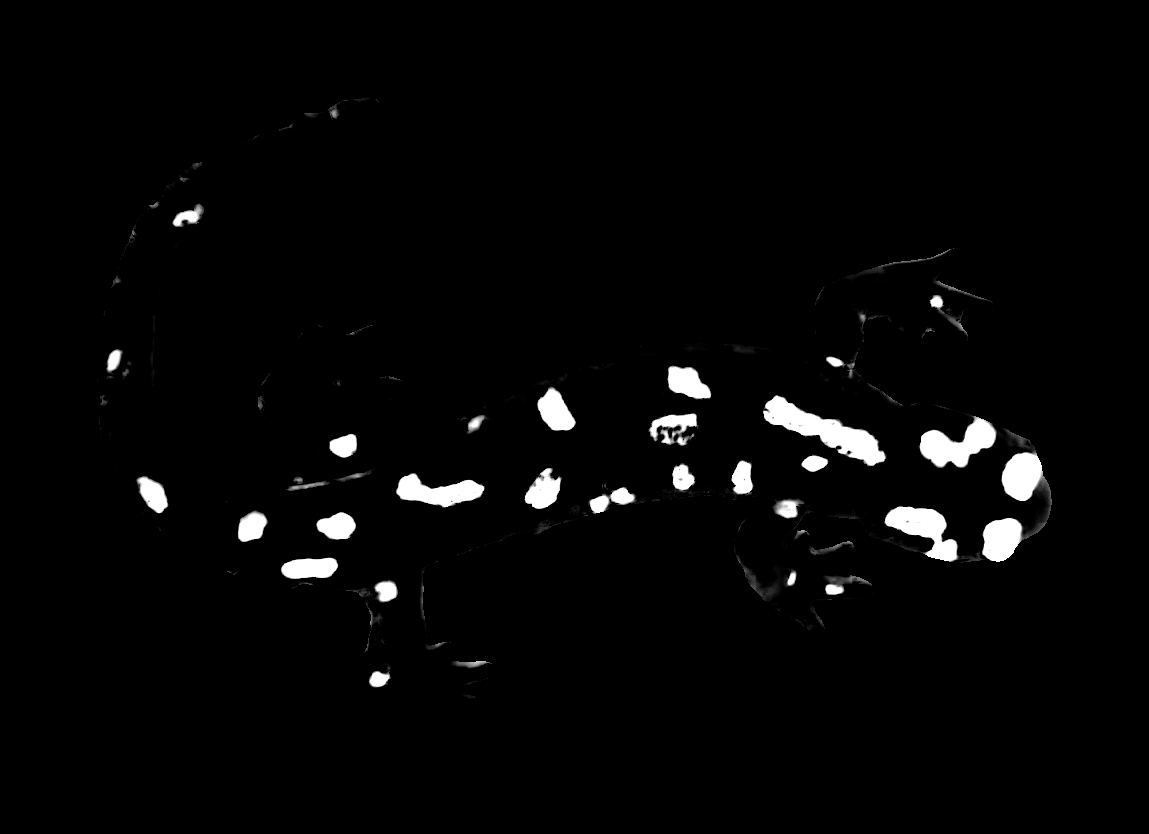

In [18]:
image0 = np.array(PIL.Image.open('/data/Env/Data/Slmndr/0/body/detection/masked_image.png'))
y0 = normalized_yellow_intensity(image0)
show_monochrome(y0)

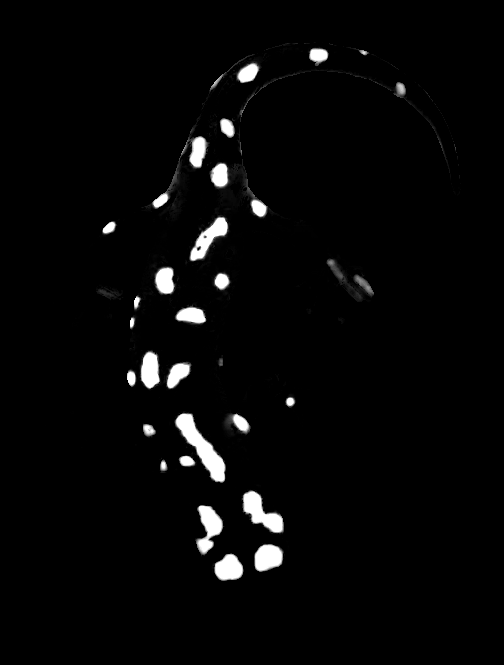

In [20]:
image1 = np.array(PIL.Image.open('/data/Env/Data/Slmndr/1/body/detection/masked_image.png'))
y1 = normalized_yellow_intensity(image1)
show_monochrome(y1)

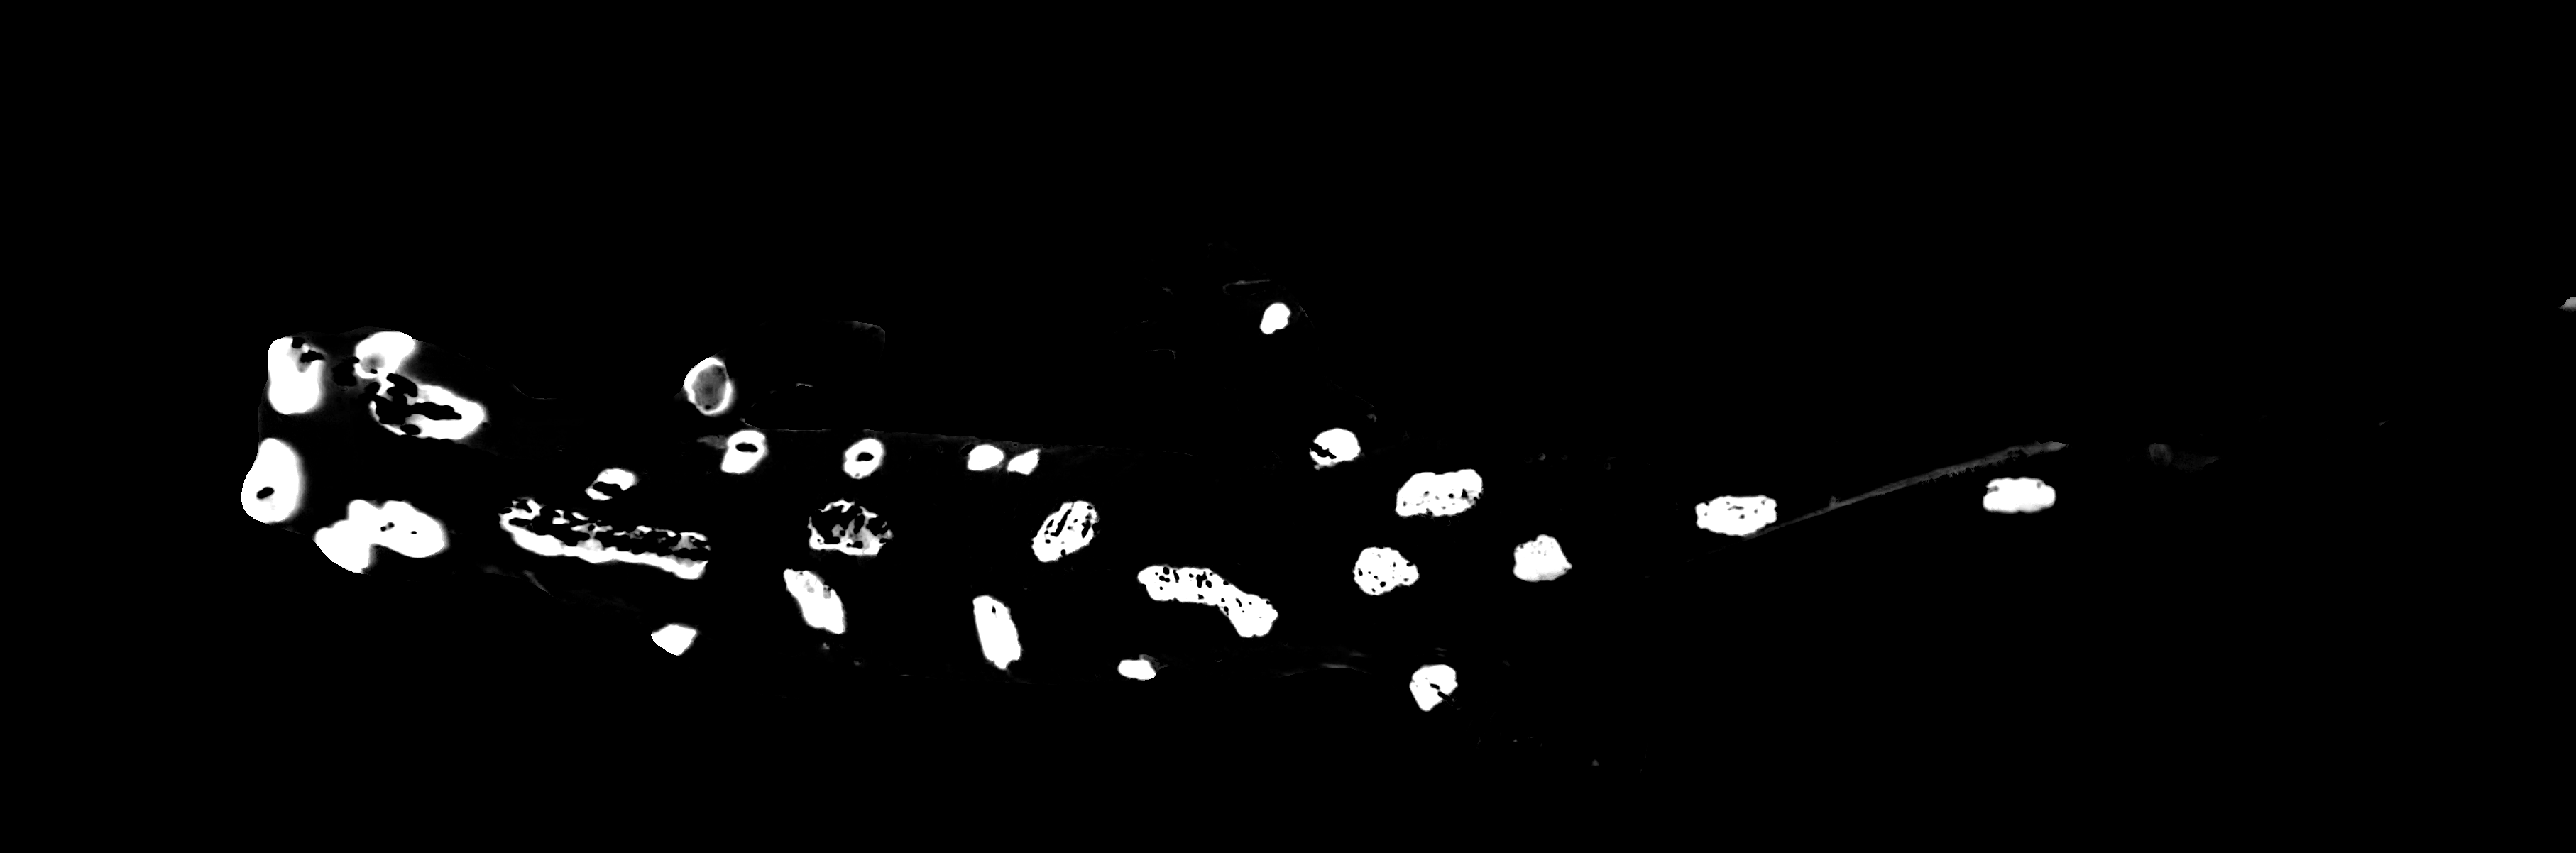

In [21]:
image2 = np.array(PIL.Image.open('/data/Env/Data/Slmndr/2/body/detection/masked_image.png'))
y2 = normalized_yellow_intensity(image2)
show_monochrome(y2)